### Shipments Plot Diff-in-Diff for Florida

In [1]:
%load_ext lab_black
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
# load shipment rate data for FL and its comparison states ((average of PA, AR, NM)
import warnings

warnings.filterwarnings("ignore")

fl_morph_rate = pd.read_csv(
    "./fl_shipment_and_pop.csv",
    sep=",",
    index_col=0,
)
avg_morph_rate_compare_to_fl = pd.read_csv(
    "./ComparisonStates.csv", sep=",", index_col=0
)

In [22]:
fl_morph_rate

,Year,BUYER_STATE,County,Population,MORPHINE_EQUIV_IN_MG,MORPH_POP_RATIO
0,2006,FL,ALACHUA,239506,8.259662e+07,344.862420
1,2006,FL,BAKER,25571,1.190018e+07,465.377914
2,2006,FL,BAY,165644,6.199810e+07,374.285229
3,2006,FL,BRADFORD,28506,1.342483e+07,470.947551
4,2006,FL,BREVARD,535138,2.011862e+08,375.951910
...,...,...,...,...,...,...
568,2014,FL,UNION,15258,4.865775e+06,318.899917
569,2014,FL,VOLUSIA,506715,2.134613e+08,421.264998
570,2014,FL,WAKULLA,31416,8.808081e+06,280.369281
571,2014,FL,WALTON,61186,2.938213e+07,480.210071


In [23]:
avg_morph_rate_compare_to_fl

,Year,BUYER_STATE,County,Population,MORPHINE_EQUIV_IN_MG,MORPH_POP_RATIO
0,2006,AR,ARKANSAS,19785,4.830745e+06,244.161975
1,2006,AR,ASHLEY,22501,4.179869e+06,185.763701
2,2006,AR,BAXTER,40867,1.160025e+07,283.853678
3,2006,AR,BENTON,195569,4.519133e+07,231.076143
4,2006,AR,BOONE,36056,1.042077e+07,289.016374
...,...,...,...,...,...,...
598,2014,PA,WASHINGTON,207963,7.375143e+07,354.637253
599,2014,PA,WAYNE,52064,2.752102e+07,528.599873
600,2014,PA,WESTMORELAND,358866,1.697060e+08,472.895246
601,2014,PA,WYOMING,28167,1.115477e+07,396.022757


In [5]:
# fl_morph_rate["County"].describe()

In [6]:
# fl_morph_rate.groupby(["Year"])["Population"].sum()

In [7]:
# avg_morph_rate_compare_to_fl["County"].describe()

In [8]:
# avg_morph_rate_compare_to_fl.groupby(["Year"])["Population"].sum()

In [24]:
# seperate to pre and post policy periods for FL its comparison states (average of PA, AR, NM)

x_pre_fl = np.array(fl_morph_rate[fl_morph_rate["Year"] < 2010]["Year"])
y_pre_fl = np.array(fl_morph_rate[fl_morph_rate["Year"] < 2010]["MORPH_POP_RATIO"])
x_post_fl = np.array(fl_morph_rate[fl_morph_rate["Year"] >= 2010]["Year"])
y_post_fl = np.array(fl_morph_rate[fl_morph_rate["Year"] >= 2010]["MORPH_POP_RATIO"])

x_pre_comp = np.array(
    avg_morph_rate_compare_to_fl[avg_morph_rate_compare_to_fl["Year"] < 2010]["Year"]
)
y_pre_comp = np.array(
    avg_morph_rate_compare_to_fl[avg_morph_rate_compare_to_fl["Year"] < 2010][
        "MORPH_POP_RATIO"
    ]
)
x_post_comp = np.array(
    avg_morph_rate_compare_to_fl[avg_morph_rate_compare_to_fl["Year"] >= 2010]["Year"]
)
y_post_comp = np.array(
    avg_morph_rate_compare_to_fl[avg_morph_rate_compare_to_fl["Year"] >= 2010][
        "MORPH_POP_RATIO"
    ]
)

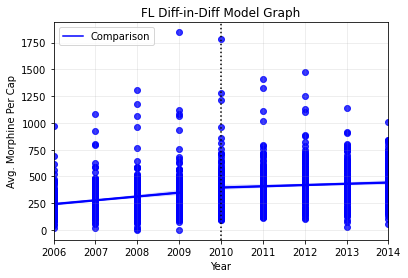

In [27]:
fig, ax = plt.subplots()

# ax.plot(x_pre_comp, y_pre_comp, "o")
m, b = np.polyfit(x_pre_comp, y_pre_comp, 1)
plt.plot(x_pre_comp, m * x_pre_comp + b, color="blue")
sns.regplot(x_pre_comp, y_pre_comp, ci=95, color="b")

# ax.plot(x_post_comp, y_post_comp, "o")
m, b = np.polyfit(x_post_comp, y_post_comp, 1)
plt.plot(x_post_comp, m * x_post_comp + b, color="blue", label="Comparison")
sns.regplot(x_post_comp, y_post_comp, ci=95, color="b")


plt.xlabel("Year")
plt.ylabel("Avg. Morphine Per Cap")
plt.title("FL Diff-in-Diff Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.legend(loc="upper left")
plt.show()

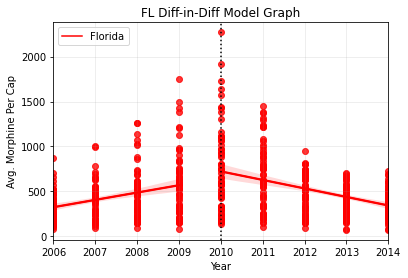

In [29]:
fig, ax = plt.subplots()
# ax.plot(x_pre_fl, y_pre_fl, "o")
m, b = np.polyfit(x_pre_fl, y_pre_fl, 1)
plt.plot(x_pre_fl, m * x_pre_fl + b, color="red")
ax = sns.regplot(x_pre_fl, y_pre_fl, ci=95, color="r")

# ax.plot(x_post_fl, y_post_fl, "o")
m, b = np.polyfit(x_post_fl, y_post_fl, 1)
plt.plot(x_post_fl, m * x_post_fl + b, color="red", label="Florida")
sns.regplot(x_post_fl, y_post_fl, ci=95, color="r")

plt.xlabel("Year")
plt.ylabel("Avg. Morphine Per Cap")
plt.title("FL Diff-in-Diff Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.legend(loc="upper left")
plt.show()

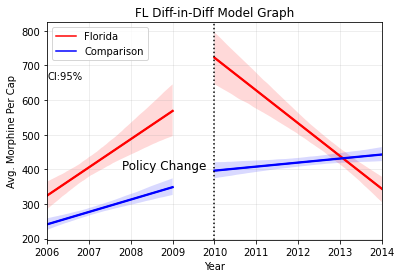

In [34]:
fig, ax = plt.subplots()
# ax.plot(x_pre_fl, y_pre_fl, "o")
m, b = np.polyfit(x_pre_fl, y_pre_fl, 1)
plt.plot(x_pre_fl, m * x_pre_fl + b, color="red")
ax = sns.regplot(x_pre_fl, y_pre_fl, ci=95, color="r", scatter=False)

# ax.plot(x_post_fl, y_post_fl, "o")
m, b = np.polyfit(x_post_fl, y_post_fl, 1)
plt.plot(x_post_fl, m * x_post_fl + b, color="red", label="Florida")
sns.regplot(x_post_fl, y_post_fl, ci=95, color="r", scatter=False)

# ax.plot(x_pre_comp, y_pre_comp, "o")
m, b = np.polyfit(x_pre_comp, y_pre_comp, 1)
plt.plot(x_pre_comp, m * x_pre_comp + b, color="blue")
sns.regplot(x_pre_comp, y_pre_comp, ci=95, color="b", scatter=False)

# ax.plot(x_post_comp, y_post_comp, "o")
m, b = np.polyfit(x_post_comp, y_post_comp, 1)
plt.plot(x_post_comp, m * x_post_comp + b, color="blue", label="Comparison")
sns.regplot(x_post_comp, y_post_comp, ci=95, color="b", scatter=False)

plt.xlabel("Year")
plt.ylabel("Avg. Morphine Per Cap")
plt.title("FL Diff-in-Diff Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.text(2007.8, 400, "Policy Change", fontsize=12)
plt.text(2006, 660, "CI:95%", fontsize=10)
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.legend(loc="upper left")
plt.show()